In [274]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from yahoo_fin import options
from datetime import datetime
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.metrics
from tensorflow.keras import optimizers
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.stats import uniform, truncnorm, randint
from keras.wrappers.scikit_learn import KerasRegressor

style.use("ggplot")

#chain = options.get_options_chain("TSLA", '03/20/2020')

#data = pd.DataFrame(chain['calls'])
#data1 = pd.DataFrame(chain['puts'])
#maturities = data.iloc[:, 1]
#strike = data.iloc[:,2]
#volatilities = data.iloc[:,10]

dataset = pd.read_csv('C:/Users/andre/Desktop/Financial Modeling/Data/Puts/allPuts.csv') #Importing data from local file
dataset = dataset.loc[dataset['Implied Volatility'] != 0]
maturities = dataset['Maturity']
strikes = dataset['Strike']
volatilities = dataset["Implied Volatility"]

In [275]:
maturities = maturities.to_numpy()
strikes = strikes.to_numpy()
volatilities = volatilities.to_numpy()



In [292]:
for i in range(volatilities.size):
    volatilities[i] = volatilities[i][:-1]
volatilities = volatilities.astype(np.float)

IndexError: invalid index to scalar variable.

In [293]:
volatilities

array([356.2, 252.3, 201.1, ...,  48.7,  48.8,  48.9])

In [294]:
inputs = []
for i in range(maturities.size):
    inputs.append([maturities[i],strikes[i]])
inputs

[[10, 100.0],
 [10, 200.0],
 [10, 300.0],
 [10, 320.0],
 [10, 325.0],
 [10, 330.0],
 [10, 335.0],
 [10, 340.0],
 [10, 345.0],
 [10, 350.0],
 [10, 355.0],
 [10, 360.0],
 [10, 365.0],
 [10, 370.0],
 [10, 375.0],
 [10, 380.0],
 [10, 385.0],
 [10, 390.0],
 [10, 395.0],
 [10, 400.0],
 [10, 405.0],
 [10, 410.0],
 [10, 415.0],
 [10, 420.0],
 [10, 425.0],
 [10, 430.0],
 [10, 435.0],
 [10, 440.0],
 [10, 445.0],
 [10, 450.0],
 [10, 455.0],
 [10, 460.0],
 [10, 465.0],
 [10, 470.0],
 [10, 475.0],
 [10, 480.0],
 [10, 485.0],
 [10, 490.0],
 [10, 495.0],
 [10, 500.0],
 [10, 510.0],
 [10, 520.0],
 [10, 530.0],
 [10, 540.0],
 [10, 542.5],
 [10, 545.0],
 [10, 547.5],
 [10, 550.0],
 [10, 552.5],
 [10, 555.0],
 [10, 557.5],
 [10, 560.0],
 [10, 562.5],
 [10, 565.0],
 [10, 567.5],
 [10, 570.0],
 [10, 572.5],
 [10, 575.0],
 [10, 577.5],
 [10, 580.0],
 [10, 582.5],
 [10, 585.0],
 [10, 587.5],
 [10, 590.0],
 [10, 592.5],
 [10, 595.0],
 [10, 597.5],
 [10, 600.0],
 [10, 602.5],
 [10, 605.0],
 [10, 607.5],
 [10, 

Text(0.5, 0, 'Volatility')

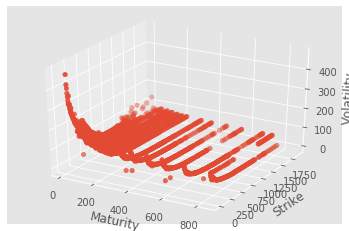

In [295]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(maturities, strikes, volatilities)
threedee.set_xlabel('Maturity')
threedee.set_ylabel('Strike')
threedee.set_zlabel('Volatility')

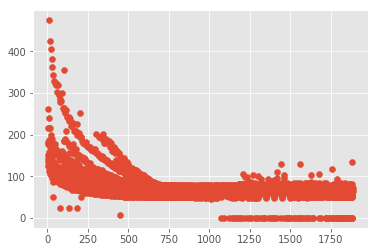

In [296]:
plt.scatter(strikes, volatilities)


In [306]:
inputs1 = inputs
volatilities1 = volatilities

In [307]:
 X_train, X_test, Y_train, Y_test = train_test_split(inputs1, volatilities1, test_size=0.20, random_state=42)

In [308]:
X_train = np.asarray(X_train)
X_train.shape

(2689, 2)

In [309]:
Y_train = np.asarray(Y_train)
Y_train.shape
Y_train

array([ 74.8,  76.9, 130.4, ...,  74.2,  73.3,  50.3])

In [310]:
Y_test = np.asarray(Y_test)
Y_test.shape

(673,)

In [311]:
X_test = np.asarray(X_test)
X_test.shape

(673, 2)

In [312]:
model = Sequential()
model.add(layers.Dense(256, input_dim=2, activation='relu'))
model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dense(256, activation='linear'))
model.add(layers.Dense(1))

In [313]:
# compiling the sequential model
model.compile(loss='mean_squared_error', optimizer='adam')

In [314]:
history = model.fit(X_train, Y_train,
          batch_size=300, epochs=500,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 2689 samples, validate on 673 samples
Epoch 1/500
2689/2689 - 1s - loss: 10677.5227 - val_loss: 3581.7038
Epoch 2/500
2689/2689 - 0s - loss: 3832.4197 - val_loss: 3469.2874
Epoch 3/500
2689/2689 - 0s - loss: 3812.7648 - val_loss: 3518.8118
Epoch 4/500
2689/2689 - 0s - loss: 3761.5924 - val_loss: 3437.7081
Epoch 5/500
2689/2689 - 0s - loss: 3820.1804 - val_loss: 3434.0572
Epoch 6/500
2689/2689 - 0s - loss: 3754.4271 - val_loss: 3539.2105
Epoch 7/500
2689/2689 - 0s - loss: 3809.1652 - val_loss: 3418.5348
Epoch 8/500
2689/2689 - 0s - loss: 3800.3868 - val_loss: 3432.4707
Epoch 9/500
2689/2689 - 0s - loss: 3745.2640 - val_loss: 3531.0104
Epoch 10/500
2689/2689 - 0s - loss: 3741.2257 - val_loss: 3368.7623
Epoch 11/500
2689/2689 - 0s - loss: 3659.7458 - val_loss: 3338.8876
Epoch 12/500
2689/2689 - 0s - loss: 3637.4292 - val_loss: 3325.0061
Epoch 13/500
2689/2689 - 0s - loss: 3611.7852 - val_loss: 3320.7039
Epoch 14/500
2689/2689 - 0s - loss: 3601.9632 - val_loss: 3300.0367
Epoch 15/

Epoch 125/500
2689/2689 - 0s - loss: 91.8251 - val_loss: 122.0132
Epoch 126/500
2689/2689 - 0s - loss: 99.8988 - val_loss: 109.1139
Epoch 127/500
2689/2689 - 0s - loss: 94.2016 - val_loss: 119.9978
Epoch 128/500
2689/2689 - 0s - loss: 93.2506 - val_loss: 104.3826
Epoch 129/500
2689/2689 - 0s - loss: 89.8477 - val_loss: 129.0496
Epoch 130/500
2689/2689 - 0s - loss: 94.7868 - val_loss: 114.2992
Epoch 131/500
2689/2689 - 0s - loss: 83.9181 - val_loss: 110.9796
Epoch 132/500
2689/2689 - 0s - loss: 85.0931 - val_loss: 99.0244
Epoch 133/500
2689/2689 - 0s - loss: 80.3795 - val_loss: 110.8560
Epoch 134/500
2689/2689 - 0s - loss: 93.3602 - val_loss: 132.7925
Epoch 135/500
2689/2689 - 0s - loss: 94.0402 - val_loss: 113.7980
Epoch 136/500
2689/2689 - 0s - loss: 86.6702 - val_loss: 123.0757
Epoch 137/500
2689/2689 - 0s - loss: 92.5307 - val_loss: 114.4407
Epoch 138/500
2689/2689 - 0s - loss: 97.1139 - val_loss: 136.7311
Epoch 139/500
2689/2689 - 0s - loss: 108.3424 - val_loss: 120.9448
Epoch 140/

Epoch 250/500
2689/2689 - 0s - loss: 93.4185 - val_loss: 104.8980
Epoch 251/500
2689/2689 - 0s - loss: 96.8791 - val_loss: 127.0618
Epoch 252/500
2689/2689 - 0s - loss: 90.4714 - val_loss: 105.1256
Epoch 253/500
2689/2689 - 0s - loss: 80.9720 - val_loss: 101.6202
Epoch 254/500
2689/2689 - 0s - loss: 77.9305 - val_loss: 118.3059
Epoch 255/500
2689/2689 - 0s - loss: 80.0134 - val_loss: 97.5446
Epoch 256/500
2689/2689 - 0s - loss: 87.1268 - val_loss: 110.7233
Epoch 257/500
2689/2689 - 0s - loss: 98.1754 - val_loss: 95.0343
Epoch 258/500
2689/2689 - 0s - loss: 93.1453 - val_loss: 112.4811
Epoch 259/500
2689/2689 - 0s - loss: 80.4997 - val_loss: 116.2338
Epoch 260/500
2689/2689 - 0s - loss: 81.6878 - val_loss: 107.0282
Epoch 261/500
2689/2689 - 0s - loss: 77.4865 - val_loss: 93.0745
Epoch 262/500
2689/2689 - 0s - loss: 75.2751 - val_loss: 94.8293
Epoch 263/500
2689/2689 - 0s - loss: 79.0331 - val_loss: 102.1368
Epoch 264/500
2689/2689 - 0s - loss: 74.9974 - val_loss: 91.3909
Epoch 265/500
2

Epoch 375/500
2689/2689 - 0s - loss: 76.5997 - val_loss: 113.5929
Epoch 376/500
2689/2689 - 0s - loss: 74.7022 - val_loss: 115.8732
Epoch 377/500
2689/2689 - 0s - loss: 74.4054 - val_loss: 117.9580
Epoch 378/500
2689/2689 - 0s - loss: 75.9281 - val_loss: 104.5306
Epoch 379/500
2689/2689 - 0s - loss: 72.1141 - val_loss: 95.0915
Epoch 380/500
2689/2689 - 0s - loss: 76.3951 - val_loss: 114.3999
Epoch 381/500
2689/2689 - 0s - loss: 80.6987 - val_loss: 94.0308
Epoch 382/500
2689/2689 - 0s - loss: 71.8004 - val_loss: 92.8854
Epoch 383/500
2689/2689 - 0s - loss: 71.9060 - val_loss: 105.0284
Epoch 384/500
2689/2689 - 0s - loss: 74.4557 - val_loss: 103.4430
Epoch 385/500
2689/2689 - 0s - loss: 80.9382 - val_loss: 100.8097
Epoch 386/500
2689/2689 - 0s - loss: 75.0713 - val_loss: 100.1697
Epoch 387/500
2689/2689 - 0s - loss: 85.2388 - val_loss: 125.8647
Epoch 388/500
2689/2689 - 0s - loss: 93.3062 - val_loss: 119.8655
Epoch 389/500
2689/2689 - 0s - loss: 77.5684 - val_loss: 100.9606
Epoch 390/500

Epoch 500/500
2689/2689 - 0s - loss: 70.0541 - val_loss: 108.0135


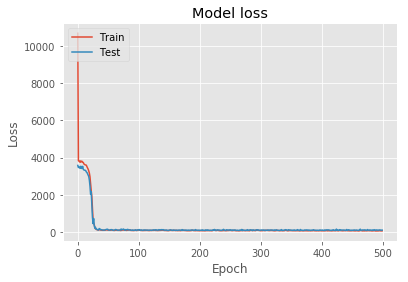

In [315]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [186]:
""" Attempt at Grid Search
max_depth = [32, 64, 128, 256, 512]
batch_size = [32,64,128]

model_params = {
    'max_depth': max_depth, 'batch_size': batch_size
}

model_tuned = GridSearchCV(estimator = model, param_grid = model_params, cv = 2, verbose=0, n_jobs = -1, scoring = 'neg_log_loss')
model2 = model_tuned.fit(X_train, Y_train)

"""

"\nmax_depth = [32, 64, 128, 256, 512]\nbatch_size = [32,64,128]\n\nmodel_params = {\n    'max_depth': max_depth, 'batch_size': batch_size\n}\n\nmodel_tuned = GridSearchCV(estimator = model, param_grid = model_params, cv = 2, verbose=0, n_jobs = -1, scoring = 'neg_log_loss')\nmodel2 = model_tuned.fit(X_train, Y_train)\n\n"

In [316]:
ymin = 10
ymax = 800
yinc = 10

xmin = 350
xmax = 2000
xinc = 25

X = np.arange(xmin, xmax, xinc)
Y = np.arange(ymin, ymax, yinc)

X, Y = np.meshgrid(X, Y)

x = np.ndarray.flatten(X)
y = np.ndarray.flatten(Y)
xtest = np.stack((x, y), axis=-1)

In [317]:
predict = model.predict(xtest)

# pred = np.ndarray.squeeze(predict, axis=1)
pred = np.reshape(predict, (int((ymax-ymin)/yinc),int((xmax-xmin)/xinc)))

print(pred)


[[146.94928  143.73737  140.71005  ...  65.83      65.38585   64.94125 ]
 [135.36142  132.70695  129.9598   ...  64.43854   64.00242   63.577057]
 [118.995636 117.362885 116.30298  ...  63.11846   62.711887  62.30599 ]
 ...
 [ 56.259777  55.411213  54.542934 ...  28.958994  28.75306   28.547153]
 [ 56.19408   55.347034  54.468594 ...  29.086563  28.893137  28.687197]
 [ 56.127598  55.280975  54.394077 ...  29.209742  29.020744  28.827274]]


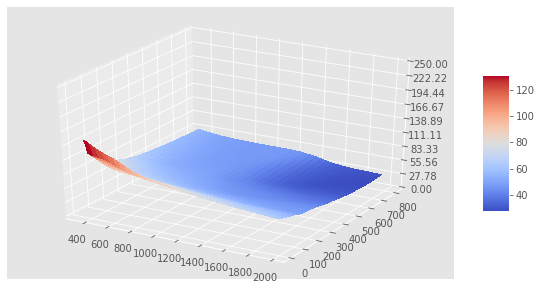

In [318]:
fig1 = plt.figure(figsize=(10, 5))
ax1 = fig1.gca(projection='3d')

surf1 = ax1.plot_surface(X, Y, pred, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax1.set_zlim(0, 250)
ax1.zaxis.set_major_locator(LinearLocator(10))
ax1.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig1.colorbar(surf1, shrink=0.5, aspect=5)
